### Import Libraries ###
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import joblib

 ### Load Test Data ###
 ---

In [5]:
test_data = pd.read_csv(r'..\Data\test_data.csv')

In [6]:
test_data

,Age,Gender,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col,Medical Condition
0,70.0,Female,108.92,NaN,25.61,95.79,3,201.87,181.95,5.02,1,1,6.94,3.16,1,4.12,5.96,ipsum,24.786689,Hypertension
1,71.0,NaN,204.04,119.29,32.57,95.54,6,178.85,177.05,8.48,1,0,0.15,4.90,0,3.88,4.58,###,-151.192973,Diabetes
2,64.0,Female,NaN,126.37,29.07,96.05,7,192.37,114.17,8.76,1,0,3.30,1.37,1,6.72,4.99,lorem,98.822593,Diabetes
3,52.0,Male,NaN,158.25,38.77,90.87,2,208.13,155.63,5.60,0,1,2.37,2.88,0,4.62,6.78,###,-104.254990,Obesity
4,NaN,NaN,104.95,167.43,28.74,95.33,3,313.68,254.17,6.08,1,0,3.43,6.41,1,9.69,8.32,lorem,19.203842,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,66.0,Female,115.23,143.02,38.46,94.62,3,231.35,138.27,5.53,0,0,2.78,3.33,1,4.75,5.69,ipsum,-191.232999,Arthritis
5096,46.0,NaN,142.35,151.07,24.79,92.82,4,282.19,185.80,6.90,1,0,3.16,5.84,1,6.59,5.79,ipsum,240.048481,Hypertension
5097,71.0,Female,123.97,165.30,20.23,93.79,4,227.01,175.70,5.21,0,1,2.90,3.82,1,7.97,6.37,lorem,-30.215543,Hypertension
5098,87.0,NaN,93.67,133.84,30.07,90.00,5,200.06,232.31,4.87,0,0,2.05,5.00,0,5.51,7.52,ipsum,-34.257338,Arthritis


### Load Models ###
---

In [7]:
final_model_gb = joblib.load (r'..\Models\fina_model_gb.pkl')

In [8]:
final_model_svm = joblib.load (r'..\Models\fina_model_svm.pkl')

### Load Preprocessing Steps ###
---

In [10]:
scaler = joblib.load (r'..\Preprocessing\scaler.pkl')

In [11]:
knn_imputer = joblib.load (r'..\Preprocessing\knn_imputer.pkl')

In [12]:
le = joblib.load (r'..\Preprocessing\label_encoder.pkl')

In [14]:
median_imputer = joblib.load (r'..\Preprocessing\median_imputer.pkl')

### Prepare Test Data ###
---

Incoherences

In [34]:
X = test_data.drop(columns = ['Medical Condition'])
y = test_data['Medical Condition']

In [35]:
X.loc[X['Physical Activity'] < 0, 'Physical Activity'] = 0

In [36]:
X.loc[X['Stress Level'] < 0, 'Stress Level'] = 0

In [37]:
X.loc[X['Diet Score'] < 0, 'Diet Score'] = 0

In [38]:
X.loc[(X['Smoking']>0) & (X['Age']<12), 'Smoking'] = 0

In [39]:
X['Smoking'].value_counts()

Smoking
0    3638
1    1462
Name: count, dtype: int64

In [40]:
X.loc[(X['Alcohol']>0) & (X['Age']<12), 'Alcohol'] = 0

In [41]:
X['Alcohol'].value_counts()

Alcohol
0    3898
1    1202
Name: count, dtype: int64

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
X['Gender'].value_counts()

Gender
Male      2183
Female    2166
Name: count, dtype: int64

In [44]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
X[['Gender']] = cat_imputer.fit_transform(X[['Gender']])

In [45]:
X['Gender'].value_counts()

Gender
Male       2183
Female     2166
Unknown     751
Name: count, dtype: int64

In [48]:
X = X.drop(columns=['random_notes'])

In [50]:
X = pd.get_dummies(X, drop_first=False)

In [51]:
X.drop(columns=['Gender_Unknown'], inplace=True)

In [52]:
X['Gender_Male'].replace({False:0, True:1}, inplace=True)
X['Gender_Female'].replace({False:0, True:1}, inplace=True)

Missing Values

In [53]:
X

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col,Gender_Female,Gender_Male
0,70.0,108.92,NaN,25.61,95.79,3,201.87,181.95,5.02,1,1,6.94,3.16,1,4.12,5.96,24.786689,1,0
1,71.0,204.04,119.29,32.57,95.54,6,178.85,177.05,8.48,1,0,0.15,4.90,0,3.88,4.58,-151.192973,0,0
2,64.0,NaN,126.37,29.07,96.05,7,192.37,114.17,8.76,1,0,3.30,1.37,1,6.72,4.99,98.822593,1,0
3,52.0,NaN,158.25,38.77,90.87,2,208.13,155.63,5.60,0,1,2.37,2.88,0,4.62,6.78,-104.254990,0,1
4,NaN,104.95,167.43,28.74,95.33,3,313.68,254.17,6.08,1,0,3.43,6.41,1,9.69,8.32,19.203842,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,66.0,115.23,143.02,38.46,94.62,3,231.35,138.27,5.53,0,0,2.78,3.33,1,4.75,5.69,-191.232999,1,0
5096,46.0,142.35,151.07,24.79,92.82,4,282.19,185.80,6.90,1,0,3.16,5.84,1,6.59,5.79,240.048481,0,0
5097,71.0,123.97,165.30,20.23,93.79,4,227.01,175.70,5.21,0,1,2.90,3.82,1,7.97,6.37,-30.215543,1,0
5098,87.0,93.67,133.84,30.07,90.00,5,200.06,232.31,4.87,0,0,2.05,5.00,0,5.51,7.52,-34.257338,0,0


In [54]:
df_num = X.copy()

In [55]:
df_num.isna().sum()

Age                  744
Glucose              780
Blood Pressure       743
BMI                    0
Oxygen Saturation      0
LengthOfStay           0
Cholesterol            0
Triglycerides          0
HbA1c                  0
Smoking                0
Alcohol                0
Physical Activity      0
Diet Score             0
Family History         0
Stress Level           0
Sleep Hours            0
noise_col              0
Gender_Female          0
Gender_Male            0
dtype: int64

In [56]:
cols_to_input = ['Age', 'Glucose', 'Blood Pressure']

In [57]:
mask_missing = df_num[cols_to_input].isna()

In [58]:
df_temp = df_num.copy()

In [59]:
df_temp[cols_to_input] = median_imputer.transform(df_num[cols_to_input])

In [60]:
df_temp_scaled = pd.DataFrame(scaler.transform(df_temp), columns=df_temp.columns)

In [61]:
df_knn = df_temp_scaled.copy()

In [62]:
df_knn [cols_to_input] = df_knn[cols_to_input].mask(mask_missing)

In [64]:
df_knn[cols_to_input] = knn_imputer.transform(df_knn[cols_to_input])

In [65]:
df_knn

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col,Gender_Female,Gender_Male
0,1.038671,-0.330787,-0.588901,-0.502736,0.222755,-0.510742,-0.333880,0.104656,-0.964188,1.620501,1.779035,1.562167,-0.483741,1.136834,-0.809939,-0.226622,0.244340,1.152145,-0.853020
1,1.106555,2.137953,-1.065531,0.712342,0.155895,0.579810,-1.018968,0.004391,1.659583,1.620501,-0.562103,-1.821820,0.472164,-0.879636,-0.918144,-1.387163,-1.520679,-0.867946,-0.853020
2,0.631366,-0.339664,-0.703689,0.101312,0.292291,0.943328,-0.616605,-1.282272,1.871911,1.620501,-0.562103,-0.251929,-1.467114,1.136834,0.362287,-1.042365,0.986895,1.152145,-0.853020
3,-0.183244,0.120085,0.925623,1.794740,-1.093062,-0.874260,-0.147579,-0.433909,-0.524365,-0.617093,1.779035,-0.715421,-0.637565,-0.879636,-0.584511,0.462974,-1.049906,-0.867946,1.172306
4,0.699250,-0.433825,1.394792,0.043700,0.099732,-0.510742,2.993647,1.582436,-0.160374,1.620501,-0.562103,-0.187140,1.301714,1.136834,1.701330,1.758070,0.188345,-0.867946,-0.853020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,0.767134,-0.167018,0.147254,1.740620,-0.090152,-0.510742,0.543461,-0.789133,-0.577447,-0.617093,-0.562103,-0.511086,-0.390348,1.136834,-0.525899,-0.453685,-1.922267,1.152145,-0.853020
5096,-0.590549,0.536853,0.558670,-0.645892,-0.571549,-0.147225,2.056488,0.183435,0.461445,1.620501,-0.562103,-0.321702,0.988573,1.136834,0.303676,-0.369588,2.403345,-0.867946,-0.853020
5097,1.106555,0.059820,1.285932,-1.441977,-0.312129,-0.147225,0.414300,-0.023233,-0.820108,-0.617093,1.779035,-0.451281,-0.121156,1.136834,0.925857,0.118176,-0.307315,1.152145,-0.853020
5098,2.192702,-0.726585,-0.321915,0.275892,-1.325736,0.216293,-0.387746,1.135133,-1.077935,-0.617093,-0.562103,-0.874902,0.527101,-0.879636,-0.183249,1.085293,-0.347853,-0.867946,-0.853020


In [66]:
X_test = df_knn.copy()

In [73]:
X_test = X_test.drop(columns=['noise_col', 'Gender_Male', 'Gender_Female', 'LengthOfStay'])

In [74]:
X_test

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours
0,1.038671,-0.330787,-0.588901,-0.502736,0.222755,-0.333880,0.104656,-0.964188,1.620501,1.779035,1.562167,-0.483741,1.136834,-0.809939,-0.226622
1,1.106555,2.137953,-1.065531,0.712342,0.155895,-1.018968,0.004391,1.659583,1.620501,-0.562103,-1.821820,0.472164,-0.879636,-0.918144,-1.387163
2,0.631366,-0.339664,-0.703689,0.101312,0.292291,-0.616605,-1.282272,1.871911,1.620501,-0.562103,-0.251929,-1.467114,1.136834,0.362287,-1.042365
3,-0.183244,0.120085,0.925623,1.794740,-1.093062,-0.147579,-0.433909,-0.524365,-0.617093,1.779035,-0.715421,-0.637565,-0.879636,-0.584511,0.462974
4,0.699250,-0.433825,1.394792,0.043700,0.099732,2.993647,1.582436,-0.160374,1.620501,-0.562103,-0.187140,1.301714,1.136834,1.701330,1.758070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,0.767134,-0.167018,0.147254,1.740620,-0.090152,0.543461,-0.789133,-0.577447,-0.617093,-0.562103,-0.511086,-0.390348,1.136834,-0.525899,-0.453685
5096,-0.590549,0.536853,0.558670,-0.645892,-0.571549,2.056488,0.183435,0.461445,1.620501,-0.562103,-0.321702,0.988573,1.136834,0.303676,-0.369588
5097,1.106555,0.059820,1.285932,-1.441977,-0.312129,0.414300,-0.023233,-0.820108,-0.617093,1.779035,-0.451281,-0.121156,1.136834,0.925857,0.118176
5098,2.192702,-0.726585,-0.321915,0.275892,-1.325736,-0.387746,1.135133,-1.077935,-0.617093,-0.562103,-0.874902,0.527101,-0.879636,-0.183249,1.085293


In [70]:
y

0       Hypertension
1           Diabetes
2           Diabetes
3            Obesity
4       Hypertension
            ...     
5095       Arthritis
5096    Hypertension
5097    Hypertension
5098       Arthritis
5099         Obesity
Name: Medical Condition, Length: 5100, dtype: object

In [78]:
y_test

array(['Hypertension', 'Diabetes', 'Diabetes', ..., 'Hypertension',
       'Arthritis', 'Obesity'], shape=(5100,), dtype=object)

### Testing ###
---


In [75]:
y_pred_gb = final_model_gb.predict(X_test)

In [76]:
y_pred_svm = final_model_svm.predict(X_test)

In [80]:
y_pred_gb = le.inverse_transform(y_pred_gb)

In [82]:
y_pred_svm = le.inverse_transform(y_pred_svm)

In [85]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [86]:
print("Accuracy GB:", accuracy_score(y_test, y_pred_gb))
print("Recall (macro) GB:", recall_score(y_test, y_pred_gb, average='macro'))
print("F1 Score (macro) GB:", f1_score(y_test, y_pred_gb, average='macro'))
print("Precision (macro) GB:", precision_score(y_test, y_pred_gb, average='macro'))

Accuracy GB: 0.8725490196078431
Recall (macro) GB: 0.8064700396489695
F1 Score (macro) GB: 0.8194274963336554
Precision (macro) GB: 0.836979290989086


In [87]:
print("Accuracy svm:", accuracy_score(y_test, y_pred_svm))
print("Recall (macro) svm:", recall_score(y_test, y_pred_svm, average='macro'))
print("F1 Score (macro) svm:", f1_score(y_test, y_pred_svm, average='macro'))
print("Precision (macro) svm:", precision_score(y_test, y_pred_svm, average='macro'))

Accuracy svm: 0.8713725490196078
Recall (macro) svm: 0.8026560657267454
F1 Score (macro) svm: 0.8152699490798676
Precision (macro) svm: 0.8345632414194665


In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

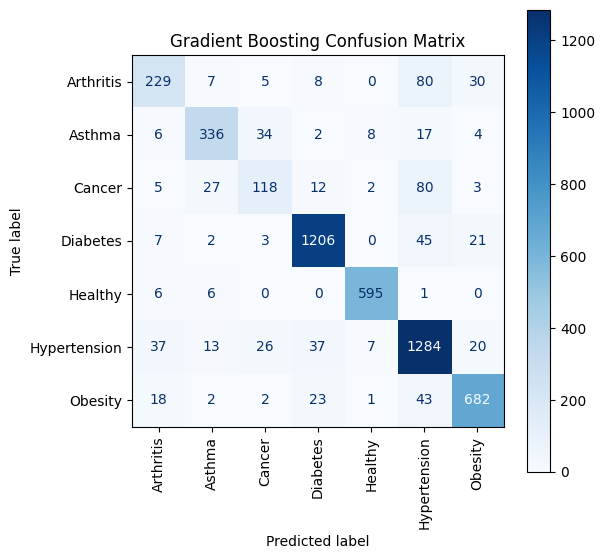

In [92]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
labels = le.classes_
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=90, ax=ax)
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

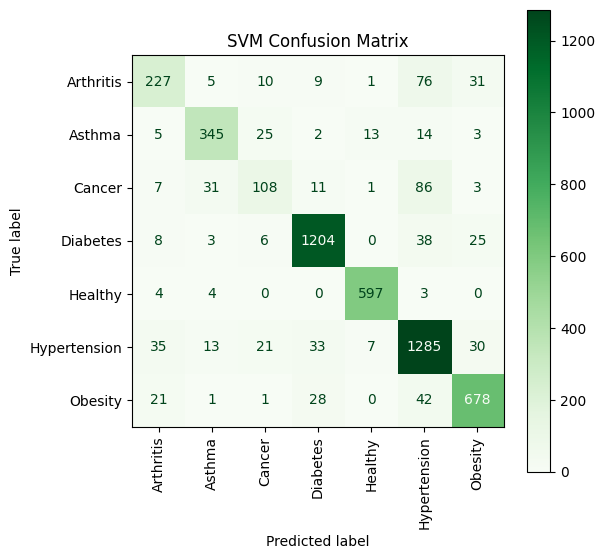

In [95]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
labels = le.classes_
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=labels)
disp.plot(cmap='Greens', xticks_rotation=90, ax=ax)
plt.title('SVM Confusion Matrix')
plt.show()